## **import the libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

 ## **load the dataset**

In [2]:
df = pd.read_csv("food_delivery_Times.csv")

In [3]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


## **EDA**

In [4]:
df.shape

(1000, 9)

In [5]:
df.dtypes

Order_ID                    int64
Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [7]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [8]:
df.nunique()

Order_ID                  1000
Distance_km                785
Weather                      5
Traffic_Level                3
Time_of_Day                  4
Vehicle_Type                 3
Preparation_Time_min        25
Courier_Experience_yrs      10
Delivery_Time_min          108
dtype: int64

In [9]:
df.select_dtypes(include=["int64", "float64"]).corr()["Delivery_Time_min"].sort_values(ascending=False)

Delivery_Time_min         1.000000
Distance_km               0.780998
Preparation_Time_min      0.307350
Order_ID                 -0.036650
Courier_Experience_yrs   -0.090433
Name: Delivery_Time_min, dtype: float64

## **visualized EDA**

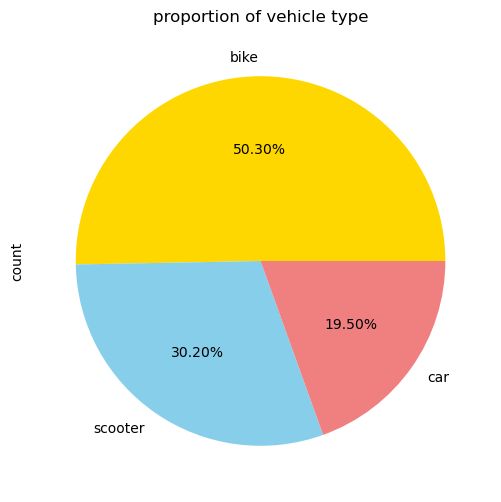

In [10]:
vehicle_type_count = df["Vehicle_Type"].value_counts()
plt.figure(figsize=(6, 6))
vehicle_type_count.plot(kind="pie",
                        labels=["bike", "scooter", "car"],
                        colors=["gold", "skyblue", "lightcoral"],
                        autopct="%.2f%%")
plt.title("proportion of vehicle type")
plt.ylabel #hides the y-axis label
plt.show()

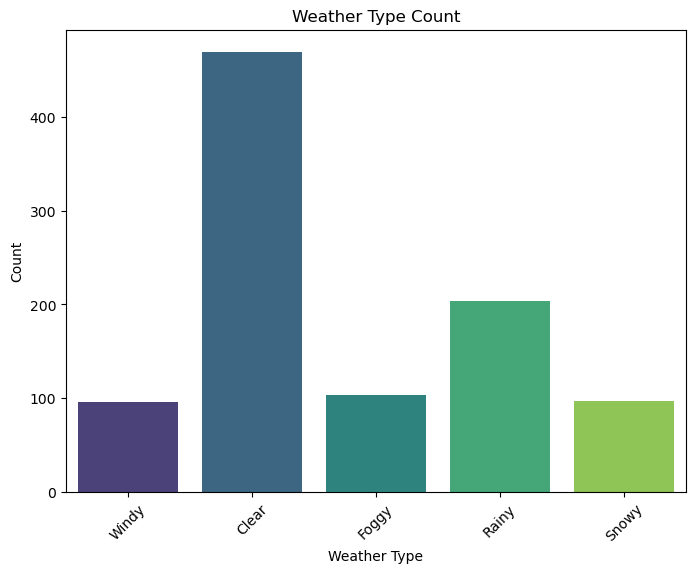

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Weather", palette="viridis")
plt.title("Weather Type Count")
plt.xlabel("Weather Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


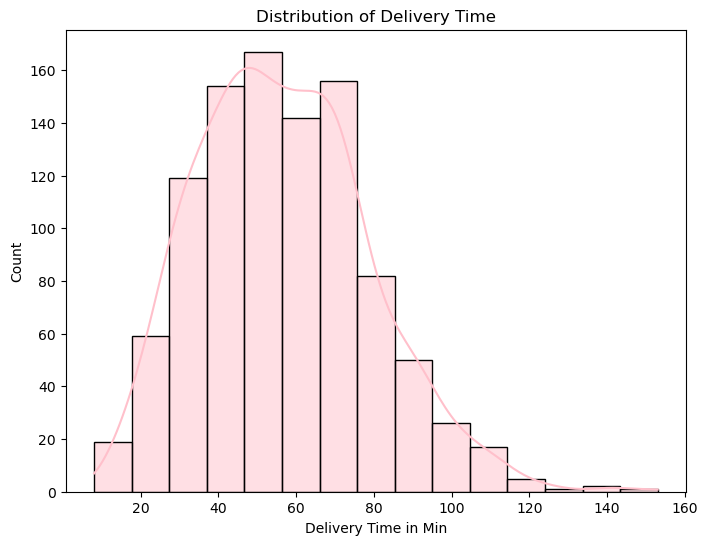

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df["Delivery_Time_min"], bins=15, kde=True, color="pink")
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time in Min")
plt.ylabel("Count")
plt.show()

## **Missing Values and Data Preprocessing**

In [13]:
df.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.isna().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] =  le.fit_transform(df[col])

In [18]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,4,1,0,2,12,1.0,43
1,738,16.42,0,2,1,0,20,2.0,84
2,741,9.52,1,1,3,2,28,1.0,59
3,661,7.44,2,2,0,2,5,1.0,37
4,412,19.03,0,1,2,0,16,5.0,68


In [19]:
np.random.seed(42)
random.seed(42)

X = df.drop(columns=["Order_ID", "Delivery_Time_min"])
y = df["Delivery_Time_min"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Regression baseline**

### **Linear Regression**

In [20]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

In [21]:
linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)


print(f"mean absolute error for linear regression is {linear_mae:.2f}")
print(f"mean squared error for linear regression is {linear_mse:.2f}")

mean absolute error for linear regression is 7.32
mean squared error for linear regression is 107.63


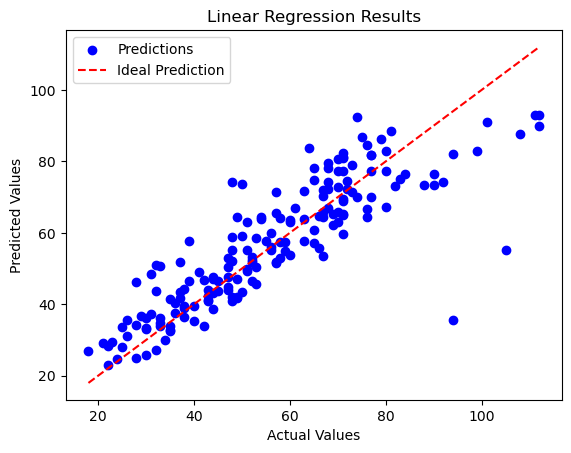

In [22]:
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Results')
plt.legend()
plt.show()


### **Decision Tree Regression**

In [23]:
tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

In [24]:
tree_mae = mean_absolute_error(y_pred, y_test)
tree_mse = mean_squared_error(y_pred, y_test)

print(f"mean absolute error for decision tree regression is {tree_mae:.2f}")
print(f"mean squared error for decision tree regression is {tree_mse:.2f}")

mean absolute error for decision tree regression is 11.08
mean squared error for decision tree regression is 246.72


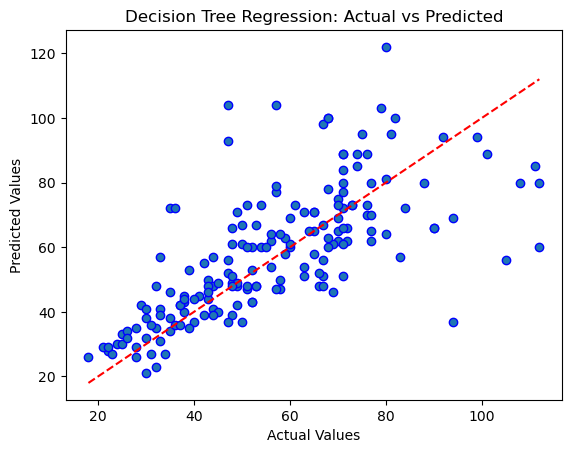

In [25]:
plt.scatter(y_test, y_pred, edgecolors='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.show()

### **Gradient Boosting Regression**

In [26]:
gboost_model = GradientBoostingRegressor()

gboost_model.fit(X_train, y_train)

y_pred = gboost_model.predict(X_test)

In [27]:
gboost_mae = mean_absolute_error(y_pred, y_test)
gboost_mse = mean_squared_error(y_pred, y_test)

print(f"mean absolute error for gboost regression is {gboost_mae:.2f}")
print(f"mean squared error for gboost regression is {gboost_mse:.2f}")

mean absolute error for gboost regression is 6.74
mean squared error for gboost regression is 97.00


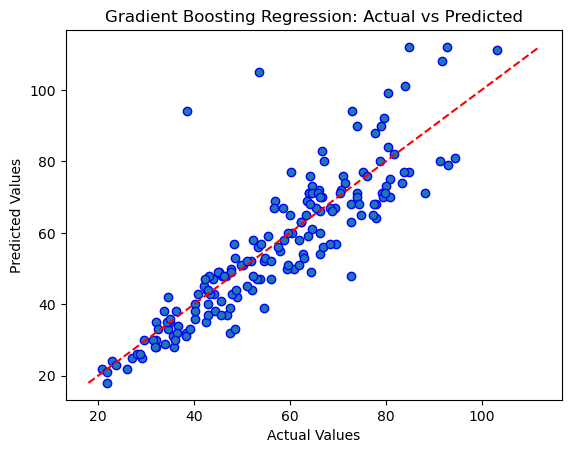

In [28]:
plt.scatter(y_pred, y_test, edgecolors="b")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Regression: Actual vs Predicted')
plt.show()

### **XGboost Regression**

In [29]:
xgboost_model = xgb.XGBRegressor()

xgboost_model.fit(X_train, y_train)

y_pred = xgboost_model.predict(X_test)

In [30]:
xgb_mae = mean_absolute_error(y_pred, y_test)
xgb_mse = mean_squared_error(y_pred, y_test)

print(f"mean absolute error for XGboost Regression is {xgb_mae:.2f}")
print(f"mean squared error for XGboost Regression is {xgb_mse:.2f}")

mean absolute error for XGboost Regression is 8.52
mean squared error for XGboost Regression is 132.27


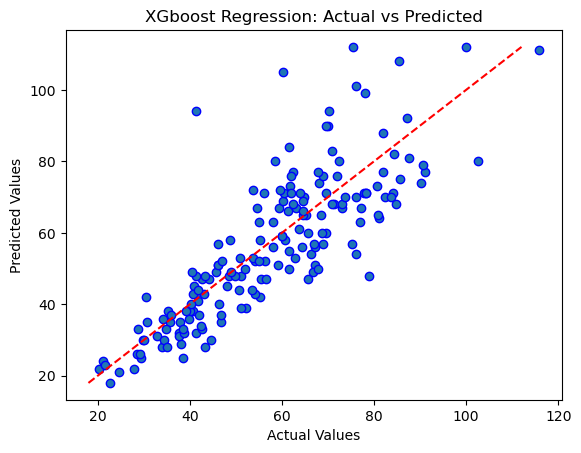

In [31]:
plt.scatter(y_pred, y_test, edgecolors="b")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGboost Regression: Actual vs Predicted')
plt.show()

## **Model Comparison**

In [32]:
results = {
    "Model": ["Linear Regression", "Decision Tree", "Gradient Boosting", "XGBoost"],
    "MAE": [linear_mae, tree_mae, gboost_mae, xgb_mae],
    "MSE": [linear_mse, tree_mse, gboost_mse, xgb_mse]
}

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="MSE")
results_df

,Model,MAE,MSE
2,Gradient Boosting,6.743865,97.003893
0,Linear Regression,7.315756,107.627662
3,XGBoost,8.518968,132.271537
1,Decision Tree,11.079096,246.717514
